In [1]:
import tensorflow as tf

# Loading the MNIST dataset in Keras

# It is a 0 to 9 digits dataset

In [3]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
print(len(train_images))
print(len(test_images))

60000
10000


In [5]:
print(len(train_labels))
print(len(test_labels))

60000
10000


Label 9


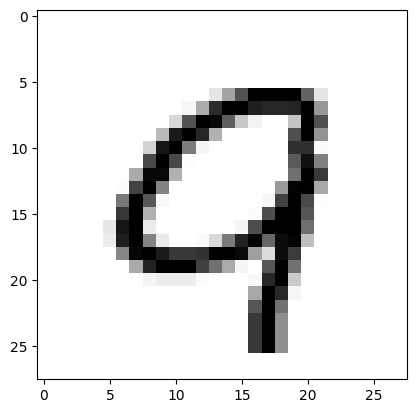

(28, 28)
2


In [13]:
i = 3000
digit = train_images[i]
label = train_labels[i]


import matplotlib.pyplot as plt

print("Label",label)
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


print(digit.shape)
print(digit.ndim)

In [14]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Label 7


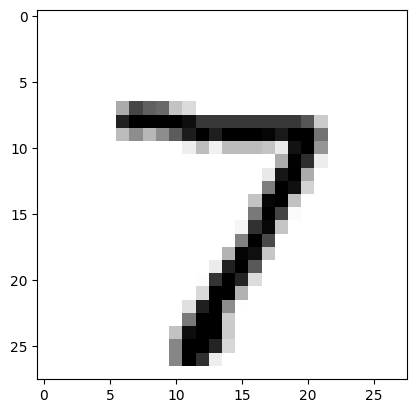

(28, 28)
2


In [19]:
i = 0
digit = test_images[i]
label = test_labels[i]


import matplotlib.pyplot as plt

print("Label",label)
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


print(digit.shape)
print(digit.ndim)

In [21]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [22]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## The network architecture

In [23]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()

network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [24]:
(28*28,)

(784,)

In [25]:
digit.shape

(28, 28)

In [26]:
digit.reshape((28*28)).shape

(784,)

## The compilation step

In [27]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Normalization

In [28]:
# X = Sample
train_images = train_images.reshape((60000, 28 * 28)) # Reshape
train_images = train_images.astype('float32') / 255 # Normalize

test_images = test_images.reshape((10000, 28 * 28)) # Reshape
test_images = test_images.astype('float32') / 255 # Normalize

# One Hot Encoding

In [29]:
# Label = Class
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [30]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [31]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Training Model

In [32]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 4ms/step - loss: 0.2640 - accuracy: 0.9240
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1067 - accuracy: 0.9681
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0699 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0513 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0384 - accuracy: 0.9882


# Testing Model

In [33]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0674 - accuracy: 0.9794
test_acc: 0.9793999791145325


In [34]:
print('test_loss',test_loss)

test_loss 0.06741709262132645


# Predicting

In [35]:
network.predict(test_images)

313/313 [==============================] - 1s 1ms/step


array([[8.6349374e-08, 2.3778495e-09, 1.3663374e-05, ..., 9.9991381e-01,
        1.7506281e-07, 1.5348884e-06],
       [1.2966335e-08, 3.6073802e-06, 9.9998677e-01, ..., 1.2646240e-13,
        2.5065781e-06, 1.7295790e-12],
       [8.9505431e-07, 9.9884820e-01, 2.8199895e-04, ..., 4.5691780e-04,
        3.1504020e-04, 4.0287368e-06],
       ...,
       [1.2531187e-11, 1.2992409e-10, 4.2222194e-11, ..., 4.2139914e-06,
        4.7887961e-06, 2.1741384e-05],
       [7.0749739e-09, 6.0952843e-10, 2.3263101e-10, ..., 2.4651436e-09,
        1.2630580e-05, 8.2108353e-10],
       [7.0970295e-08, 1.4789355e-12, 2.8959812e-07, ..., 7.0353479e-14,
        5.8105929e-09, 2.9377747e-10]], dtype=float32)

In [36]:
network.predict(test_images)[0]

313/313 [==============================] - 1s 4ms/step


array([8.6349374e-08, 2.3778495e-09, 1.3663374e-05, 7.0705297e-05,
       1.5345303e-11, 9.7926325e-09, 1.7056695e-12, 9.9991381e-01,
       1.7506281e-07, 1.5348884e-06], dtype=float32)